In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from utils_feature_engineering import plot_in_pitch
%run utils_feature_engineering

In [4]:
df = pd.read_csv('shots_df_all_leagues_for_model.csv').drop('Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['minut', 'x_position', 'y_position', 'Counter attack', 'Goal',
       'Head/body', 'distance', 'angle', 'x_coordinate_recovery',
       'y_coordinate_recovery', 'possesion_time', 'with_natural_foot',
       'Right foot', 'Left foot', 'three_quarters_field_recuperation',
       'simple_pass', 'ground_atacking_duel', 'cross', 'air_duel',
       'smart_pass', 'corner_pass', 'high_pass', 'head_pass',
       'Position: Goal center', 'Position: Goal center left',
       'Position: Goal center right', 'Position: Goal high center',
       'Position: Goal high left', 'Position: Goal high right',
       'Position: Goal low center', 'Position: Goal low left',
       'Position: Goal low right', 'Position: Out center left',
       'Position: Out center right', 'Position: Out high center',
       'Position: Out high left', 'Position: Out high right',
       'Position: Out low left', 'Position: Out low right',
       'Position: Post center left', 'Position: Post center right',
       'Position

In [47]:
df[df['Position: Goal center']==1]['Goal'].value_counts()

0    1437
1     286
Name: Goal, dtype: int64

ANALITZEM CARACTERISTIQUES DELS XUTS

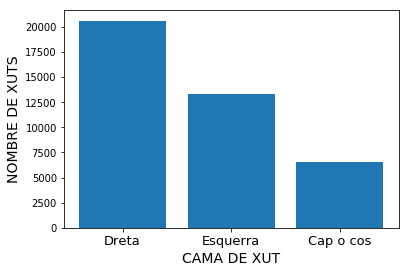

In [6]:
right = df['Right foot'].sum()
left = df['Left foot'].sum()
other = df['Head/body'].sum()

plt.bar(['Dreta', 'Esquerra', 'Cap o cos'], [right, left, other])
plt.xlabel('CAMA DE XUT', fontsize=14)
plt.ylabel('NOMBRE DE XUTS',fontsize=14)
plt.xticks(fontsize=13)

plt.show()


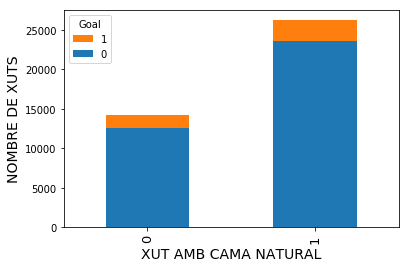

In [7]:
recuperacion_counts = df.groupby('with_natural_foot')['Goal'].value_counts().unstack().fillna(0)
recuperacion_counts.plot(kind='bar', stacked=True, legend='reverse')

plt.xlabel('XUT AMB CAMA NATURAL', fontsize=14)
plt.ylabel('NOMBRE DE XUTS', fontsize=14)
plt.xticks(fontsize=13)
plt.show()

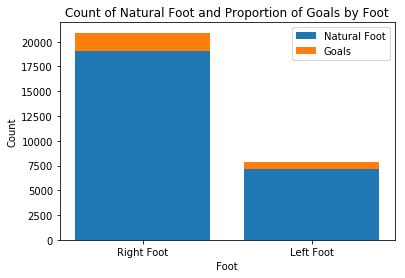

In [8]:
import matplotlib.pyplot as plt

derecha_natural = df[df['Right foot'] == 1]['with_natural_foot'].value_counts()
derecha_goles = df[(df['Right foot'] == 1) & (df['Goal'] == 1)]['with_natural_foot'].value_counts()

izquierda_natural = df[df['Left foot'] == 1]['with_natural_foot'].value_counts()
izquierda_goles = df[(df['Left foot'] == 1) & (df['Goal'] == 1)]['with_natural_foot'].value_counts()

natural = [derecha_natural[1], izquierda_natural[1]]
goles = [derecha_goles[1], izquierda_goles[1]]

labels = ['Right Foot', 'Left Foot']

fig, ax = plt.subplots()
ax.bar(labels, natural, label='Natural Foot')
ax.bar(labels, goles, label='Goals', bottom=natural)

ax.set_xlabel('Foot')
ax.set_ylabel('Count')
ax.set_title('Count of Natural Foot and Proportion of Goals by Foot')
ax.legend()

plt.show()


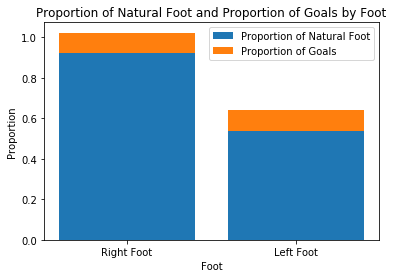

In [9]:
import matplotlib.pyplot as plt

derecha_total = df[df['Right foot'] == 1].shape[0]
derecha_natural = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 1)].shape[0] / derecha_total
derecha_goles = df[(df['Right foot'] == 1) & (df['Goal'] == 1)].shape[0] / derecha_total
izquierda_total = df[df['Left foot'] == 1].shape[0]
izquierda_natural = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 1)].shape[0] / izquierda_total
izquierda_goles = df[(df['Left foot'] == 1) & (df['Goal'] == 1)].shape[0] / izquierda_total
natural = [derecha_natural, izquierda_natural]
goles = [derecha_goles, izquierda_goles]

labels = ['Right Foot', 'Left Foot']

fig, ax = plt.subplots()
ax.bar(labels, natural, label='Proportion of Natural Foot')
ax.bar(labels, goles, label='Proportion of Goals', bottom=natural)

ax.set_xlabel('Foot')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Natural Foot and Proportion of Goals by Foot')
ax.legend()

plt.show()


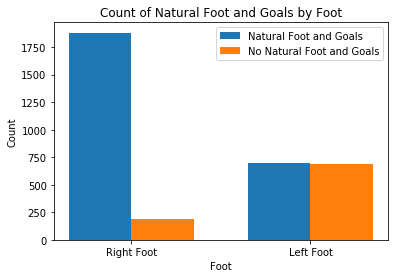

In [12]:
import matplotlib.pyplot as plt
import numpy as np

derecha_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
derecha_natural_total = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 1)].shape[0]
derecha_no_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
derecha_no_natural_total = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 0)].shape[0]

izquierda_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
izquierda_natural_total = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 1)].shape[0]
izquierda_no_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
izquierda_no_natural_total = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 0)].shape[0]

natural_goles = [derecha_natural_goles, izquierda_natural_goles]
natural_total = [derecha_natural_total, izquierda_natural_total]
no_natural_goles = [derecha_no_natural_goles, izquierda_no_natural_goles]
no_natural_total = [derecha_no_natural_total, izquierda_no_natural_total]

labels = ['Right Foot', 'Left Foot']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, natural_goles, width, label='Natural Foot and Goals')
rects2 = ax.bar(x + width/2, no_natural_goles, width, label='No Natural Foot and Goals')

ax.set_xlabel('Foot')
ax.set_ylabel('Count')
ax.set_title('Count of Natural Foot and Goals by Foot')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [13]:
n=df[df['with_natural_foot']==1][['Goal', 'Left foot', 'Right foot']]
nn = df[df['with_natural_foot']==0][['Goal', 'Left foot', 'Right foot']]

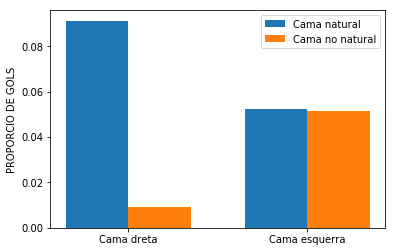

In [14]:
import matplotlib.pyplot as plt
import numpy as np

derecha_total = df[df['Right foot'] == 1].shape[0]
derecha_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
derecha_no_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
derecha_natural_prop = derecha_natural_goles / derecha_total
derecha_no_natural_prop = derecha_no_natural_goles / derecha_total

izquierda_total = df[df['Left foot'] == 1].shape[0]
izquierda_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
izquierda_no_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
izquierda_natural_prop = izquierda_natural_goles / izquierda_total
izquierda_no_natural_prop = izquierda_no_natural_goles / izquierda_total

natural_props = [derecha_natural_prop, izquierda_natural_prop]
no_natural_props = [derecha_no_natural_prop, izquierda_no_natural_prop]

labels = ['Cama dreta', 'Cama esquerra']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, natural_props, width, label='Cama natural')
rects2 = ax.bar(x + width/2, no_natural_props, width, label='Cama no natural')

ax.set_ylabel("PROPORCIO DE GOLS")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


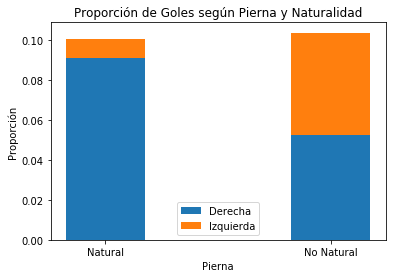

In [15]:
import matplotlib.pyplot as plt

derecha_total = df[df['Right foot'] == 1].shape[0]
derecha_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
derecha_no_natural_goles = df[(df['Right foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
derecha_natural_prop = derecha_natural_goles / derecha_total
derecha_no_natural_prop = derecha_no_natural_goles / derecha_total

izquierda_total = df[df['Left foot'] == 1].shape[0]
izquierda_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 1) & (df['Goal'] == 1)].shape[0]
izquierda_no_natural_goles = df[(df['Left foot'] == 1) & (df['with_natural_foot'] == 0) & (df['Goal'] == 1)].shape[0]
izquierda_natural_prop = izquierda_natural_goles / izquierda_total
izquierda_no_natural_prop = izquierda_no_natural_goles / izquierda_total

natural_props = [derecha_natural_prop, izquierda_natural_prop]
no_natural_props = [derecha_no_natural_prop, izquierda_no_natural_prop]

labels = ['Natural', 'No Natural']

x = range(len(labels))

fig, ax = plt.subplots()
ax.bar(x, natural_props, width=0.35, label='Derecha')
ax.bar(x, no_natural_props, width=0.35, label='Izquierda', bottom=natural_props)

ax.set_xlabel('Pierna')
ax.set_ylabel('Proporción')
ax.set_title('Proporción de Goles según Pierna y Naturalidad')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


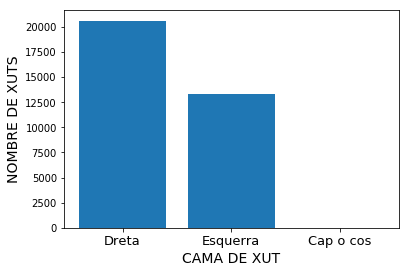

In [16]:
right = df['Right foot'].sum()
left = df['Left foot'].sum()
other = df['Head/body'].sum()

plt.bar(['Dreta', 'Esquerra', 'Cap o cos'], [right, left, other])
plt.xlabel('CAMA DE XUT', fontsize=14)
plt.ylabel('NOMBRE DE XUTS',fontsize=14)
plt.xticks(fontsize=13)

plt.show()

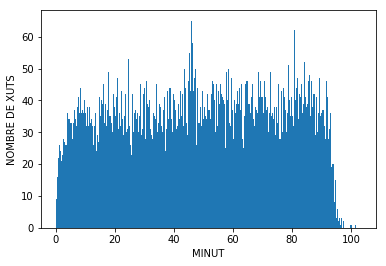

In [17]:
plt.hist(df['minut'], bins=1000)
plt.xlabel('MINUT')
plt.ylabel('NOMBRE DE XUTS')
plt.show()

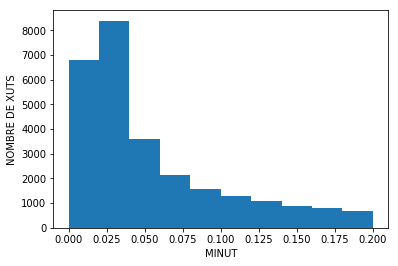

In [18]:
plt.hist(df['possesion_time'], bins=10, range = (0,0.2))
plt.xlabel('MINUT')
plt.ylabel('NOMBRE DE XUTS')
plt.show()

In [19]:
df['ground_atacking_duel'].value_counts()

0    25507
1     8430
Name: ground_atacking_duel, dtype: int64

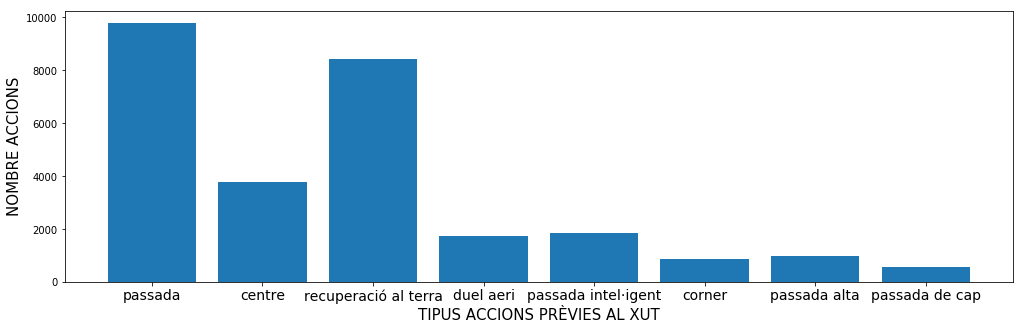

In [20]:
h = df['simple_pass'].sum()
g = df['cross'].sum()
a = df['ground_atacking_duel'].sum()
b = df['air_duel'].sum()
c = df['smart_pass'].sum()
d = df['corner_pass'].sum()
e = df['high_pass'].sum()
f = df['head_pass'].sum()

plt.figure(figsize=(17, 5))
plt.bar(['passada','centre', 'recuperació al terra', 'duel aeri', 'passada intel·igent', 
         'corner', 'passada alta', 'passada de cap'], [h,g,a,b,c,d,e,f])
plt.xlabel('TIPUS ACCIONS PRÈVIES AL XUT', fontsize=15)
plt.ylabel('NOMBRE ACCIONS', fontsize=15)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
goles_asistencia

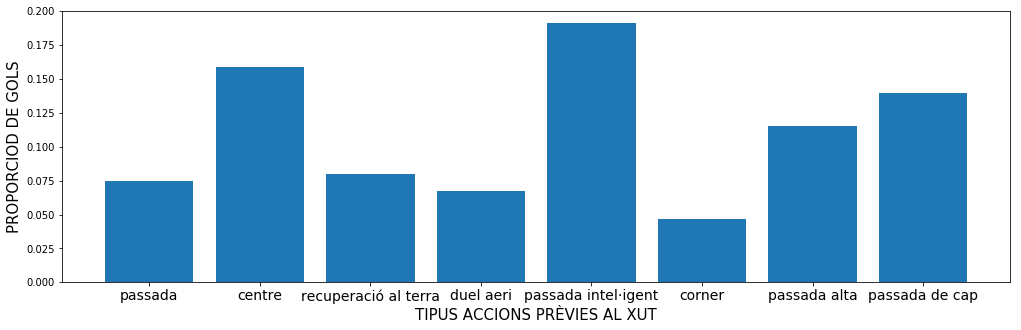

In [22]:
import matplotlib.pyplot as plt

total_asistencia = df[['simple_pass', 'cross', 'ground_atacking_duel', 'air_duel', 'smart_pass', 'corner_pass', 'high_pass', 'head_pass']].sum()

goles_asistencia = df.loc[df['Goal'] == 1, ['simple_pass', 'cross', 'ground_atacking_duel', 'air_duel', 'smart_pass', 'corner_pass', 'high_pass', 'head_pass']].sum()

proporcion_goles = goles_asistencia / total_asistencia

plt.figure(figsize=(17, 5))
plt.bar(['passada','centre', 'recuperació al terra', 'duel aeri', 'passada intel·igent', 
         'corner', 'passada alta', 'passada de cap'], proporcion_goles)
plt.xlabel('TIPUS ACCIONS PRÈVIES AL XUT', fontsize=15)
plt.ylabel('PROPORCIOD DE GOLS', fontsize=15)
plt.xticks(fontsize=14)
plt.show()


In [23]:
total_recs = df['three_quarters_field_recuperation'].sum()
goal_recs =df[df['Goal']==1]['three_quarters_field_recuperation'].sum()
no_goal_recs = df[df['Goal']==0]['three_quarters_field_recuperation'].sum()

In [24]:
df['Goal'].value_counts()

0    30486
1     3451
Name: Goal, dtype: int64

In [25]:
4269/36186

0.11797380202288178

In [26]:
goal_recs/total_recs

0.15392670157068064

In [27]:
no_goal_recs

1616

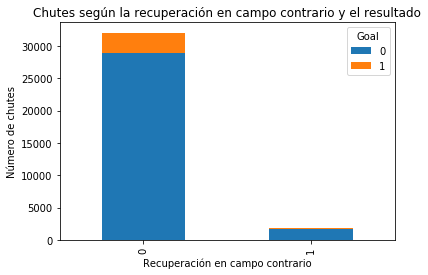

In [28]:
import matplotlib.pyplot as plt

recuperacion_counts = df.groupby('three_quarters_field_recuperation')['Goal'].value_counts().unstack().fillna(0)

recuperacion_counts.plot(kind='bar', stacked=True)

plt.xlabel('Recuperación en campo contrario')
plt.ylabel('Número de chutes')
plt.title('Chutes según la recuperación en campo contrario y el resultado')

plt.show()


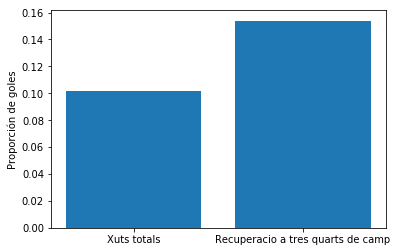

<Figure size 1224x360 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

proporcion_total_goles = df['Goal'].mean()

df_recuperacion_1 = df[df['three_quarters_field_recuperation'] == 1]

proporcion_recuperacion_1_goles = df_recuperacion_1['Goal'].mean()

fig, ax = plt.subplots()
ax.bar(['Xuts totals', 'Recuperacio a tres quarts de camp'], [proporcion_total_goles, proporcion_recuperacion_1_goles])

ax.set_ylabel('Proporción de goles')
plt.figure(figsize=(17, 5))
plt.show()


C:\Users\guill\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


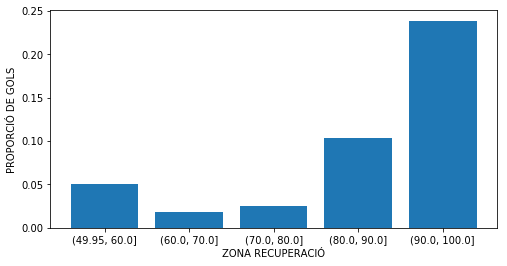

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df[df['x_position'] >= 50]

df_filtered['x_position_range'] = pd.cut(df_filtered['x_position'], bins=5)

proportion_goles = df_filtered.groupby('x_position_range')['Goal'].mean()

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(proportion_goles.index.astype(str), proportion_goles)

ax.set_xlabel("ZONA RECUPERACIÓ")
ax.set_ylabel('PROPORCIÓ DE GOLS')
plt.show()


In [31]:
df['with_natural_foot'].value_counts()

1    26210
0     7727
Name: with_natural_foot, dtype: int64

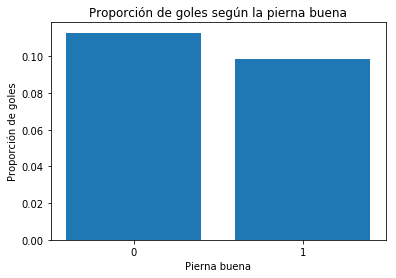

In [32]:
import matplotlib.pyplot as plt
dff= df[df['Head/body']==0]

proportion_goles = dff.groupby('with_natural_foot')['Goal'].sum() / dff.groupby('with_natural_foot')['Goal'].count()

fig, ax = plt.subplots()
ax.bar(proportion_goles.index.astype(str), proportion_goles)

ax.set_xlabel('Pierna buena')
ax.set_ylabel('Proporción de goles')
ax.set_title('Proporción de goles según la pierna buena')

plt.show()

In [33]:
import numpy as np

goles = np.array(df['Goal'])
x_position = np.array(df['x_position'])

hist, bin_edges = np.histogram(x_position, bins=10)

proporcion_goles = []

for i in range(len(bin_edges) - 1):
    goles_rango = goles[(x_position >= bin_edges[i]) & (x_position < bin_edges[i+1])]
    proporcion_goles.append(np.mean(goles_rango))

for i, proporcion in enumerate(proporcion_goles):
    print(f"Rango {i+1}: {proporcion}")


Rango 1: 0.18181818181818182
Rango 2: 0.0
Rango 3: 0.0
Rango 4: 0.0
Rango 5: 0.016666666666666666
Rango 6: 0.0547945205479452
Rango 7: 0.01794453507340946
Rango 8: 0.024929997290217686
Rango 9: 0.10334450447985774
Rango 10: 0.23813695429989779


In [34]:
goal_recs + no_goal_recs == total_recs

True

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# recuperacion_gol_counts = df.groupby(['three_quarters_field_recuperation', 'Goal']).size().unstack()

# x = np.arange(len(recuperacion_gol_counts.columns))
# width = 0.35

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, recuperacion_gol_counts[False], width, label='No gol')
# rects2 = ax.bar(x + width/2, recuperacion_gol_counts[True], width, label='Gol')

# ax.set_xlabel('Recuperación en campo contrario')
# ax.set_ylabel('Número de chutes')
# ax.set_title('Chutes según la recuperación en campo contrario y el resultado')
# ax.set_xticks(x)
# ax.set_xticklabels(recuperacion_gol_counts.columns)
# ax.legend()

# plt.show()

In [39]:
goals = df.loc[(df['Goal']==1)]
no_goals = df.loc[(df['Goal']==0)]

In [40]:
goals = goals[goals['x_position']>60]
no_goals = no_goals[no_goals['x_position']>60]

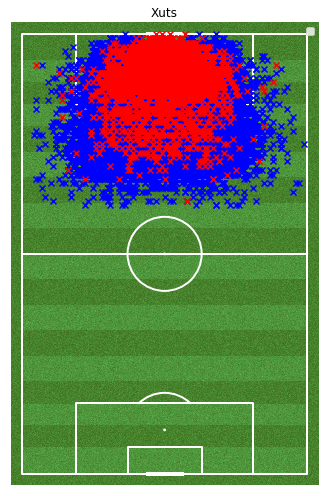

In [41]:
pitch = VerticalPitch(pitch_type='wyscout',pitch_color='grass', line_color='white', stripe=True, linewidth=2)
fig, ax = pitch.draw(figsize=(7,7))
pitch.scatter(no_goals['x_position'],no_goals['y_position'],color='blue',ax=ax, marker='x')
pitch.scatter(goals['x_position'],goals['y_position'],color='red',ax=ax, marker='x')
plt.title('Xuts')
plt.legend('Gol', 'No gol')
plt.show()

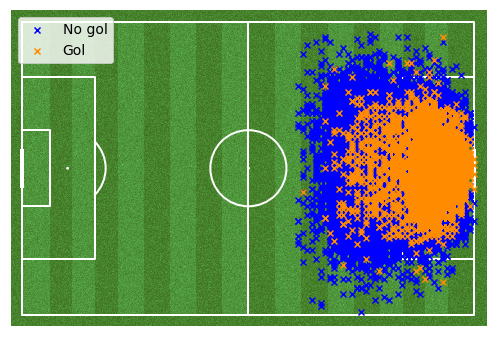

In [42]:
pitch = Pitch(pitch_type='wyscout',pitch_color='grass', line_color='white', stripe=True, linewidth=2)
fig, ax = pitch.draw(figsize=(7,7))
pitch.scatter(no_goals['x_position'],no_goals['y_position'],color='blue',ax=ax, marker='x', label='No gol')
pitch.scatter(goals['x_position'],goals['y_position'],color='darkorange',ax=ax, marker='x', label='Gol')
plt.legend(prop={'size': 14})
plt.show()

In [297]:
dff= df[df['x_position']>60]

In [316]:
derecha_total = dff[dff['Right foot'] == 1]
izquierda_total = dff[dff['Left foot'] == 1]
cabeza = dff[dff['Head/body'] == 1]
cama_bona = dff[dff['with_natural_foot']==1]
cama_no_bona = dff[(dff['with_natural_foot']==0) & (dff['Head/body'] == 0)]

In [318]:
cama_bona

,minut,x_position,y_position,Counter attack,Goal,Head/body,distance,angle,x_coordinate_recovery,y_coordinate_recovery,...,Position: Out high right,Position: Out low left,Position: Out low right,Position: Post center left,Position: Post center right,Position: Post high center,Position: Post high left,Position: Post high right,Position: Post low left,Position: Post low right
1,1.012121,80,59,0,0,0,21.799599,15.57,100,100,...,0,0,0,0,0,0,0,0,0,0
2,7.449769,88,57,0,0,0,13.396361,19.86,91,61,...,0,0,0,0,0,0,0,0,0,0
3,8.148819,87,66,0,0,0,17.160492,37.30,11,35,...,1,0,0,0,0,0,0,0,0,0
4,15.814535,75,40,0,0,0,27.042790,13.91,10,42,...,0,0,0,0,0,0,0,0,0,0
5,17.137947,78,69,0,0,0,26.194131,28.13,54,74,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,45.600184,93,61,0,0,0,10.254024,44.21,62,88,...,0,0,0,0,0,0,0,0,0,0
40449,51.681610,86,66,0,0,0,18.006943,35.28,13,25,...,0,0,0,0,0,0,0,0,0,0
40451,58.603902,89,27,0,0,0,18.891929,52.31,75,51,...,0,0,0,0,0,0,0,0,0,0
40452,60.337352,86,63,0,0,0,16.955604,29.89,6,47,...,0,0,0,0,0,0,0,0,0,0


In [306]:
len(cama_bona) + len(cama_no_bona) + len(cabeza)

66340

C:\Users\guill\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


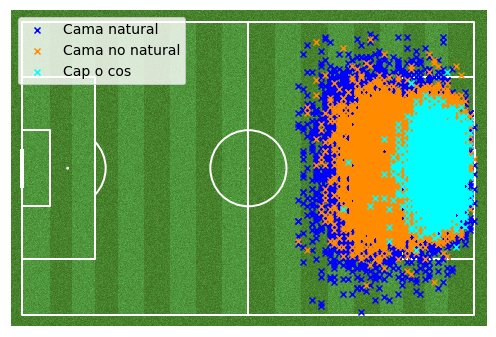

In [329]:
pitch = Pitch(pitch_type='wyscout',pitch_color='grass', line_color='white', stripe=True, linewidth=2)
fig, ax = pitch.draw(figsize=(7,7))
pitch.scatter(cama_bona['x_position'],cama_bona['y_position'],color='blue',ax=ax, marker='x', label='Cama natural')
pitch.scatter(cama_no_bona['x_position'],cama_no_bona['y_position'],color='darkorange',ax=ax, marker='x', label='Cama no natural')
pitch.scatter(cabeza['x_position'],cabeza['y_position'],color='cyan',ax=ax, marker='x', label='Cap o cos')

plt.legend(prop={'size': 14})
plt.show()